# Early Model Testing

In [13]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import os
import time

### Load dataset

In [14]:
input_file_name = "lotOfFeatures.csv"
input_file_path = os.path.join(os.path.join(os.getcwd(), "data"), input_file_name)

original_data = pd.read_csv(input_file_path, index_col=0, parse_dates=True)
originalSize = original_data.shape[1]
original_data.head()
original_data.shape

(140350, 445)

## Excluding Testing Set

Spliting the dataset into three parts: training, testing and evaluation (last 10 percent).

In [15]:
#start_time = '2012-02-01 00:00:00'
start_time = '2014-02-01 00:00:00'
splitting_point = int(0.9 * original_data.shape[0])
splitting_time = original_data.iloc[[splitting_point]].index.to_pydatetime()[0]
#data = original_data[:splitting_time]
data = original_data[start_time:]

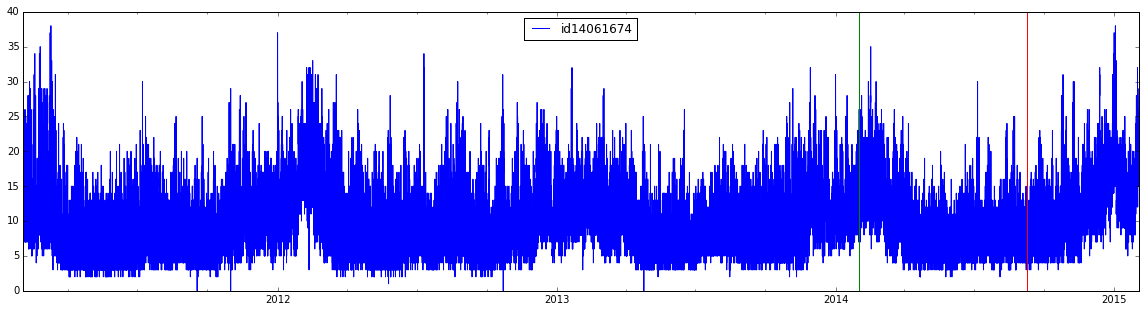

In [16]:
f = original_data[["id14061674"]].plot(figsize=(20,5)) 
original_data.iloc(splitting_point)
f.axvline(start_time, color='g')
f.axvline(splitting_time, color='r')

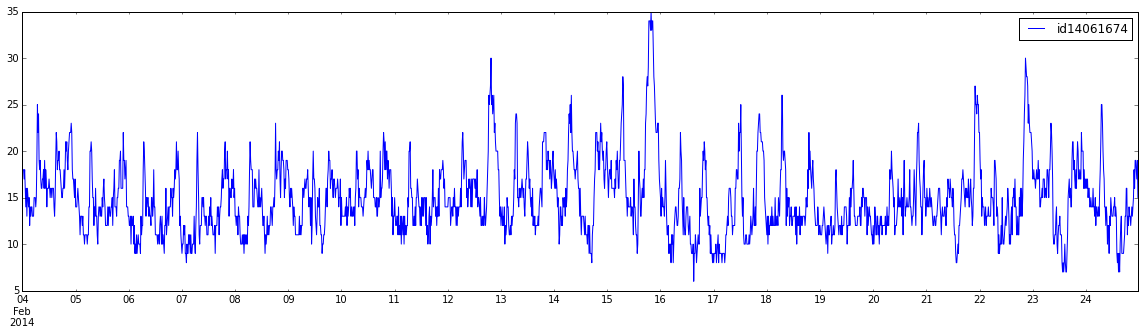

In [17]:
data['2014-02-04':'2014-02-24'][["id14061674"]].plot(figsize=(20,5))  

## Creating Feature Sets

In [18]:
target_col = 'id14061674'

In [19]:
sensor_cols_to_drop = [col for col in list(data) if col.startswith('id') and not col.startswith(target_col)]
#[col for col in list(data) if col not in sensor_cols_to_drop]
data.drop(sensor_cols_to_drop, axis=1, inplace=True)
list(data)

C:\Python27\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


['id14061674',
 'p',
 't2m_termin',
 'rh_termin',
 'padavine',
 'veter_hitrost',
 'veter_vek_smer',
 'energija_gl',
 'energija_di',
 'HourOfDay',
 'DayOfWeek',
 'Month',
 'Weekday',
 'Weekend',
 'Holiday',
 'DayBeforeHoliday',
 'DayAfterHodliay',
 'BusinessDay',
 'id14061674_roll_mean_1h',
 'id14061674_roll_mean_6h',
 'id14061674_roll_mean_d',
 'id14061674_roll_mean_w',
 'id14061674_roll_mean_m',
 'id14061674_roll_min2_d',
 'id14061674_roll_min2_w',
 'id14061674_roll_max2_d',
 'id14061674_roll_max2_w',
 'id14061674_roll_var_6h',
 'id14061674_roll_var_d',
 'id14061674_roll_var_w',
 'p_roll_mean_1h',
 'p_roll_mean_6h',
 'p_roll_mean_d',
 'p_roll_mean_w',
 'p_roll_mean_m',
 'p_roll_var_1h',
 'p_roll_var_d',
 't2m_termin_roll_mean_1h',
 't2m_termin_roll_mean_6h',
 't2m_termin_roll_mean_d',
 't2m_termin_roll_mean_w',
 't2m_termin_roll_mean_m',
 't2m_termin_roll_min2_d',
 't2m_termin_roll_min2_w',
 't2m_termin_roll_max2_d',
 't2m_termin_roll_max2_w',
 't2m_termin_roll_var_1h',
 't2m_termin_r

In [20]:
columnsToShift = list(data)
shiftedColumns = ["shifted_" + col for col in columnsToShift]

In [21]:
measurements_cols = [col for col in list(data) if col.startswith(target_col)]

wetaher_current_cols =  ['p', 't2m_termin', 'rh_termin', 'padavine', 'veter_hitrost', 'veter_vek_smer', 'energija_gl',
 'energija_di', 'p_roll_mean_1h', 'p_roll_mean_6h', 'p_roll_mean_d', 'p_roll_mean_w', 'p_roll_mean_m', 'p_roll_var_1h',
 'p_roll_var_d', 't2m_termin_roll_mean_1h', 't2m_termin_roll_mean_6h', 't2m_termin_roll_mean_d', 't2m_termin_roll_mean_w',
 't2m_termin_roll_mean_m', 't2m_termin_roll_min2_d', 't2m_termin_roll_min2_w', 't2m_termin_roll_max2_d',
 't2m_termin_roll_max2_w', 't2m_termin_roll_var_1h', 't2m_termin_roll_var_d', 'rh_termin_roll_mean_1h',
 'rh_termin_roll_mean_6h', 'rh_termin_roll_mean_d', 'rh_termin_roll_mean_w', 'rh_termin_roll_mean_m',
 'rh_termin_roll_min2_d', 'rh_termin_roll_min2_w', 'rh_termin_roll_max2_d', 'rh_termin_roll_max2_w',
 'rh_termin_roll_var_1h', 'rh_termin_roll_var_d', 'energija_gl_roll_mean_1h', 'energija_gl_roll_mean_6h',
 'energija_gl_roll_mean_d', 'energija_gl_roll_mean_w', 'energija_gl_roll_mean_m', 'energija_gl_roll_var_1h',
 'energija_gl_roll_var_d']

weather_forecasted_cols =  ['shifted_p', 'shifted_t2m_termin', 'shifted_rh_termin', 'shifted_padavine', 
                            'shifted_veter_hitrost', 'shifted_veter_vek_smer', 'shifted_energija_gl']

date_time_cols =  ['shifted_HourOfDay', 'shifted_DayOfWeek', 'shifted_Month', 'shifted_Weekday', 'shifted_Weekend', 
                   'shifted_Holiday', 'shifted_DayBeforeHoliday', 'shifted_DayAfterHodliay', 'shifted_BusinessDay', 
                   'shifted_BusinessDay_sum', 'shifted_Holiday_sum']

In [22]:
all_cols = measurements_cols + wetaher_current_cols + weather_forecasted_cols + date_time_cols 
m_wc_wf_cols = measurements_cols + wetaher_current_cols + weather_forecasted_cols
m_wc_dt_cols = measurements_cols + wetaher_current_cols + date_time_cols 
m_wf_dt_cols = measurements_cols + weather_forecasted_cols + date_time_cols 
m_dt_cols = measurements_cols + date_time_cols 
m_cols = measurements_cols

## Define Machine Learning Models and Data Sets

In [23]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn import neighbors
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score

## Prediction Results

In [24]:
data_sets = [{'name': "all_cols", 'cols': all_cols},
             #{'name': "m_wc_wf_cols", 'cols': m_wc_wf_cols},
             {'name': "m_wc_dt_cols", 'cols': m_wc_dt_cols},
             {'name': "m_wf_dt_cols", 'cols': m_wf_dt_cols},
             {'name': "m_dt_cols", 'cols': m_dt_cols},
             #{'name': "m_cols", 'cols': m_cols},
             ]

error_metrics = [{'name': "R2 Score", 'short': "R2", 'function': metrics.r2_score},
                 #{'name': "Explained Variance Score", 'short': "EV", 'function': metrics.explained_variance_score},
                 {'name': "Mean Absolute Error", 'short': "MAE", 'function': metrics.mean_absolute_error},
                 {'name': "Mean Squared Error", 'short': "MSE", 'function': metrics.mean_squared_error}
                ]

validation_df = pd.DataFrame(columns=pd.MultiIndex.from_arrays([[],[]], names=['dataset', 'error_metric']))

In [25]:
for horizon in range (1,25):
    print "\nWorking on prediction horizon: {}h".format(horizon)
        
    data[shiftedColumns] = data[columnsToShift].shift(horizon, freq='H')
    data.dropna(inplace=True)
    
    training_data = data[:splitting_time]
    testing_data = data[splitting_time:]
    
    for data_set in data_sets:
        #print "Dataset:\t {}".format(data_set['name'])
        model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, n_jobs=7)
        
        X_train = training_data[data_set['cols']].values
        y_train = training_data[["shifted_" + target_col]].values.ravel()

        X_test = testing_data[data_set['cols']].values
        y_test = testing_data[["shifted_" + target_col]].values.ravel()

        start = time.time() # Start measuring time
        model.fit(X_train,y_train)
        runtime = time.time() - start # Calculate runtime

        for metric in error_metrics:

            error = metric['function'](y_test, model.predict(X_test))
            validation_df.loc[horizon, (data_set['name'], metric['short'])] = error
            #print "{}: {:.3f}".format(metric['name'], error)


C:\Python27\lib\site-packages\pandas\core\frame.py:2148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Working on prediction horizon: 1h

Working on prediction horizon: 2h

Working on prediction horizon: 3h

Working on prediction horizon: 4h

Working on prediction horizon: 5h

Working on prediction horizon: 6h

Working on prediction horizon: 7h

Working on prediction horizon: 8h

Working on prediction horizon: 9h

Working on prediction horizon: 10h

Working on prediction horizon: 11h

Working on prediction horizon: 12h

Working on prediction horizon: 13h

Working on prediction horizon: 14h

Working on prediction horizon: 15h

Working on prediction horizon: 16h

Working on prediction horizon: 17h

Working on prediction horizon: 18h

Working on prediction horizon: 19h

Working on prediction horizon: 20h

Working on prediction horizon: 21h

Working on prediction horizon: 22h

Working on prediction horizon: 23h

Working on prediction horizon: 24h


In [26]:
validation_df.loc['Mean'] = validation_df.mean()
validation_df

dataset       all_cols                      m_wc_dt_cols                       \
error_metric        R2       MAE        MSE           R2       MAE        MSE   
1             0.895284  1.176366   2.375912     0.895793  1.175206   2.364367   
2             0.782362  1.699026   4.936030     0.775279  1.719658   5.096656   
3             0.774936  1.715969   5.104423     0.777059  1.706148   5.056280   
4             0.767697  1.707680   5.269097     0.758933  1.722517   5.467881   
5             0.762726  1.724851   5.380705     0.765057  1.721344   5.327838   
6             0.645782  2.136140   8.026364     0.640805  2.134421   8.139128   
7             0.599411  2.261436   9.065575     0.589153  2.285970   9.297735   
8             0.584015  2.291533   9.411920     0.585821  2.308999   9.371060   
9             0.580445  2.300790   9.489158     0.601869  2.273254   9.004613   
10            0.587591  2.274895   9.328375     0.611150  2.243175   8.795498   
11            0.592619  2.274146   9.216678     0.605809  2.239089   8.918259   
12            0.578046  2.312219   9.546789     0.578537  2.297953   9.535682   
13            0.579070  2.341778   9.525711     0.561307  2.359300   9.927695   
14            0.547254  2.376701  10.248859     0.548367  2.368943  10.223648   
15            0.561698  2.367267   9.922096     0.542782  2.388643  10.350305   
16            0.566079  2.372822   9.820099     0.520222  2.447168  10.857903   
17            0.584111  2.306341   9.413804     0.563250  2.348858   9.885997   
18            0.568144  2.355707   9.776772     0.518899  2.438873  10.891623   
19            0.580795  2.337079   9.486217     0.551055  2.403066  10.159212   
20            0.584156  2.337410   9.410796     0.573968  2.343141   9.641356   
21            0.572728  2.336293   9.670170     0.565825  2.349228   9.826389   
22            0.568481  2.346795   9.764535     0.579012  2.321634   9.526228   
23            0.537198  2.486051  10.470265     0.552159  2.440806  10.131776   
24            0.491894  2.653790  11.487065     0.457449  2.708438  12.265791   
Mean          0.620522  2.187212   8.589476     0.613315  2.197743   8.752622   

dataset      m_wf_dt_cols                     m_dt_cols                       
error_metric           R2       MAE       MSE        R2       MAE        MSE  
1                0.896041  1.172486  2.358725  0.897243  1.167894   2.331468  
2                0.785357  1.692872  4.868106  0.785026  1.684452   4.875607  
3                0.787284  1.683699  4.824367  0.791243  1.658777   4.734586  
4                0.763786  1.710288  5.357805  0.765664  1.698295   5.315204  
5                0.767656  1.710965  5.268907  0.769032  1.702922   5.237697  
6                0.645324  2.142593  8.036727  0.661547  2.055818   7.669138  
7                0.592555  2.260571  9.220738  0.584163  2.264401   9.410654  
8                0.587799  2.252176  9.326307  0.577200  2.268241   9.566112  
9                0.577625  2.282271  9.552938  0.584405  2.259432   9.399615  
10               0.593021  2.251878  9.205561  0.612224  2.204672   8.771200  
11               0.587482  2.265558  9.332884  0.580892  2.256570   9.481977  
12               0.583192  2.287159  9.430360  0.573023  2.275661   9.660427  
13               0.588445  2.271908  9.313556  0.577387  2.267843   9.563790  
14               0.579029  2.289369  9.529570  0.549646  2.327999  10.194698  
15               0.582459  2.283891  9.452111  0.571434  2.286964   9.701701  
16               0.579949  2.299281  9.506209  0.565388  2.302752   9.835740  
17               0.600690  2.241952  9.038528  0.608909  2.212983   8.852487  
18               0.602902  2.238100  8.989888  0.612206  2.210588   8.779256  
19               0.587035  2.285921  9.345015  0.616434  2.204097   8.679756  
20               0.610763  2.233225  8.808660  0.622556  2.188033   8.541781  
21               0.590684  2.259185  9.263773  0.607834  2.214000   8.8756

NOTE: From this, it looks like weather does not help to improve accuracy. Date time features are the most important.

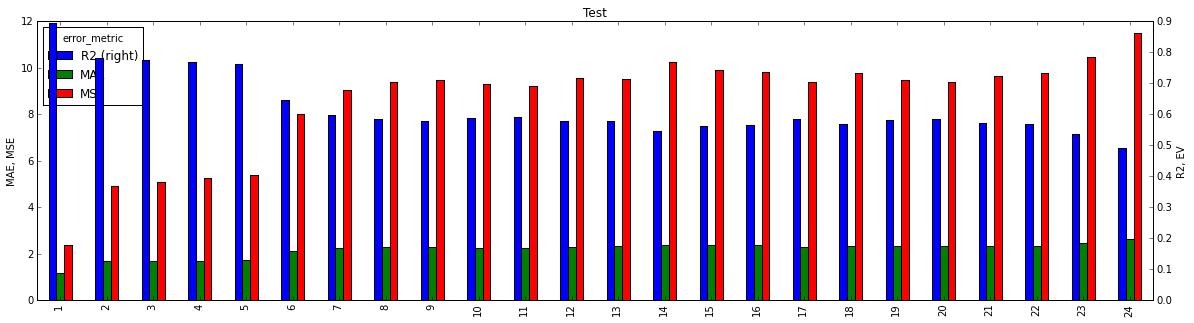

In [27]:
ax = validation_df['all_cols'].iloc[0:24].plot(kind='bar', figsize=(20,5), secondary_y=['R2'], title="Test")
ax.set_ylabel('MAE, MSE')
ax.right_ax.set_ylabel('R2')
#ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))


## Feature Importance

In [28]:
feature_importances = pd.DataFrame(index=all_cols)
feature_importances.index.name = "Feature"
feature_importances.columns.name = "Horizon"
#feature_importances

In [29]:
for horizon in range (1,25):
    print "\nWorking on prediction horizon: {}h".format(horizon)
        
    data[shiftedColumns] = data[columnsToShift].shift(horizon, freq='H')
    data.dropna(inplace=True)
    
    training_data = data[:splitting_time]
    testing_data = data[splitting_time:]
    
    model = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, n_jobs=7)

    X_train = training_data[all_cols].values
    y_train = training_data[["shifted_" + target_col]].values.ravel()

    X_test = testing_data[all_cols].values
    y_test = testing_data[["shifted_" + target_col]].values.ravel()

    start = time.time() # Start measuring time
    model.fit(X_train,y_train)
    runtime = time.time() - start # Calculate runtime
        
    feature_importances.loc[:,horizon] = model.feature_importances_


Working on prediction horizon: 1h

Working on prediction horizon: 2h

Working on prediction horizon: 3h

Working on prediction horizon: 4h

Working on prediction horizon: 5h

Working on prediction horizon: 6h

Working on prediction horizon: 7h

Working on prediction horizon: 8h

Working on prediction horizon: 9h

Working on prediction horizon: 10h

Working on prediction horizon: 11h

Working on prediction horizon: 12h

Working on prediction horizon: 13h

Working on prediction horizon: 14h

Working on prediction horizon: 15h

Working on prediction horizon: 16h

Working on prediction horizon: 17h

Working on prediction horizon: 18h

Working on prediction horizon: 19h

Working on prediction horizon: 20h

Working on prediction horizon: 21h

Working on prediction horizon: 22h

Working on prediction horizon: 23h

Working on prediction horizon: 24h


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [30]:
feature_importances

Horizon,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
Feature,,,,,,,,,,,,,,,,,,,,,
id14061674,4.126584e-02,0.003833,0.003442,0.001204,0.001231,0.001907,0.001474,0.002077,0.002029,0.002376,...,0.001646,0.002176,0.002040,0.001603,0.001680,0.001944,0.001791,0.002053,0.033909,0.020054
id14061674_roll_mean_1h,8.825592e-01,0.034146,0.022742,0.067311,0.073323,0.010361,0.009869,0.007363,0.006580,0.007726,...,0.006063,0.006859,0.006901,0.007297,0.008130,0.006403,0.005542,0.005352,0.009637,0.365556
id14061674_roll_mean_6h,1.487275e-02,0.761659,0.802690,0.770155,0.671648,0.043334,0.012462,0.018680,0.026974,0.027634,...,0.010713,0.011986,0.013177,0.012443,0.013045,0.019723,0.030733,0.030755,0.028296,0.016867
id14061674_roll_mean_d,1.474501e-03,0.003812,0.006987,0.010159,0.007078,0.481438,0.518802,0.522706,0.518128,0.507733,...,0.501029,0.494504,0.489454,0.486217,0.479303,0.467833,0.467819,0.452277,0.417037,0.085243
id14061674_roll_mean_w,9.756343e-04,0.002535,0.003312,0.002563,0.007921,0.008227,0.007151,0.008733,0.008079,0.005815,...,0.004905,0.004706,0.004861,0.006441,0.005371,0.005663,0.005392,0.006384,0.008297,0.010612
id14061674_roll_mean_m,7.959568e-04,0.002085,0.001946,0.001827,0.002039,0.004927,0.004461,0.004720,0.005341,0.005071,...,0.004957,0.004046,0.004588,0.006032,0.004742,0.004521,0.003800,0.005469,0.007056,0.011751
id14061674_roll_min2_d,1.966540e-04,0.000489,0.000484,0.000333,0.000647,0.001256,0.001571,0.001540,0.001254,0.001172,...,0.001545,0.001336,0.001380,0.001096,0.002098,0.001243,0.002037,0.001526,0.001774,0.002590
id14061674_roll_min2_w,9.380781e-05,0.000119,0.000155,0.000087,0.000131,0.000203,0.000150,0.000217,0.000089,0.000210,...,0.000328,0.000273,0.000295,0.000247,0.000303,0.000172,0.000301,0.000360,0.000216,0.000281
id14061674_roll_max2_d,7.270067e-04,0.001230,0.001407,0.001415,0.002401,0.002449,0.007082,0.005538,0.003521,0.004137,...,0.004698,0.005745,0.006170,0.005116,0.003769,0.005633,0.006021,0.005321,0.007154,0.012335


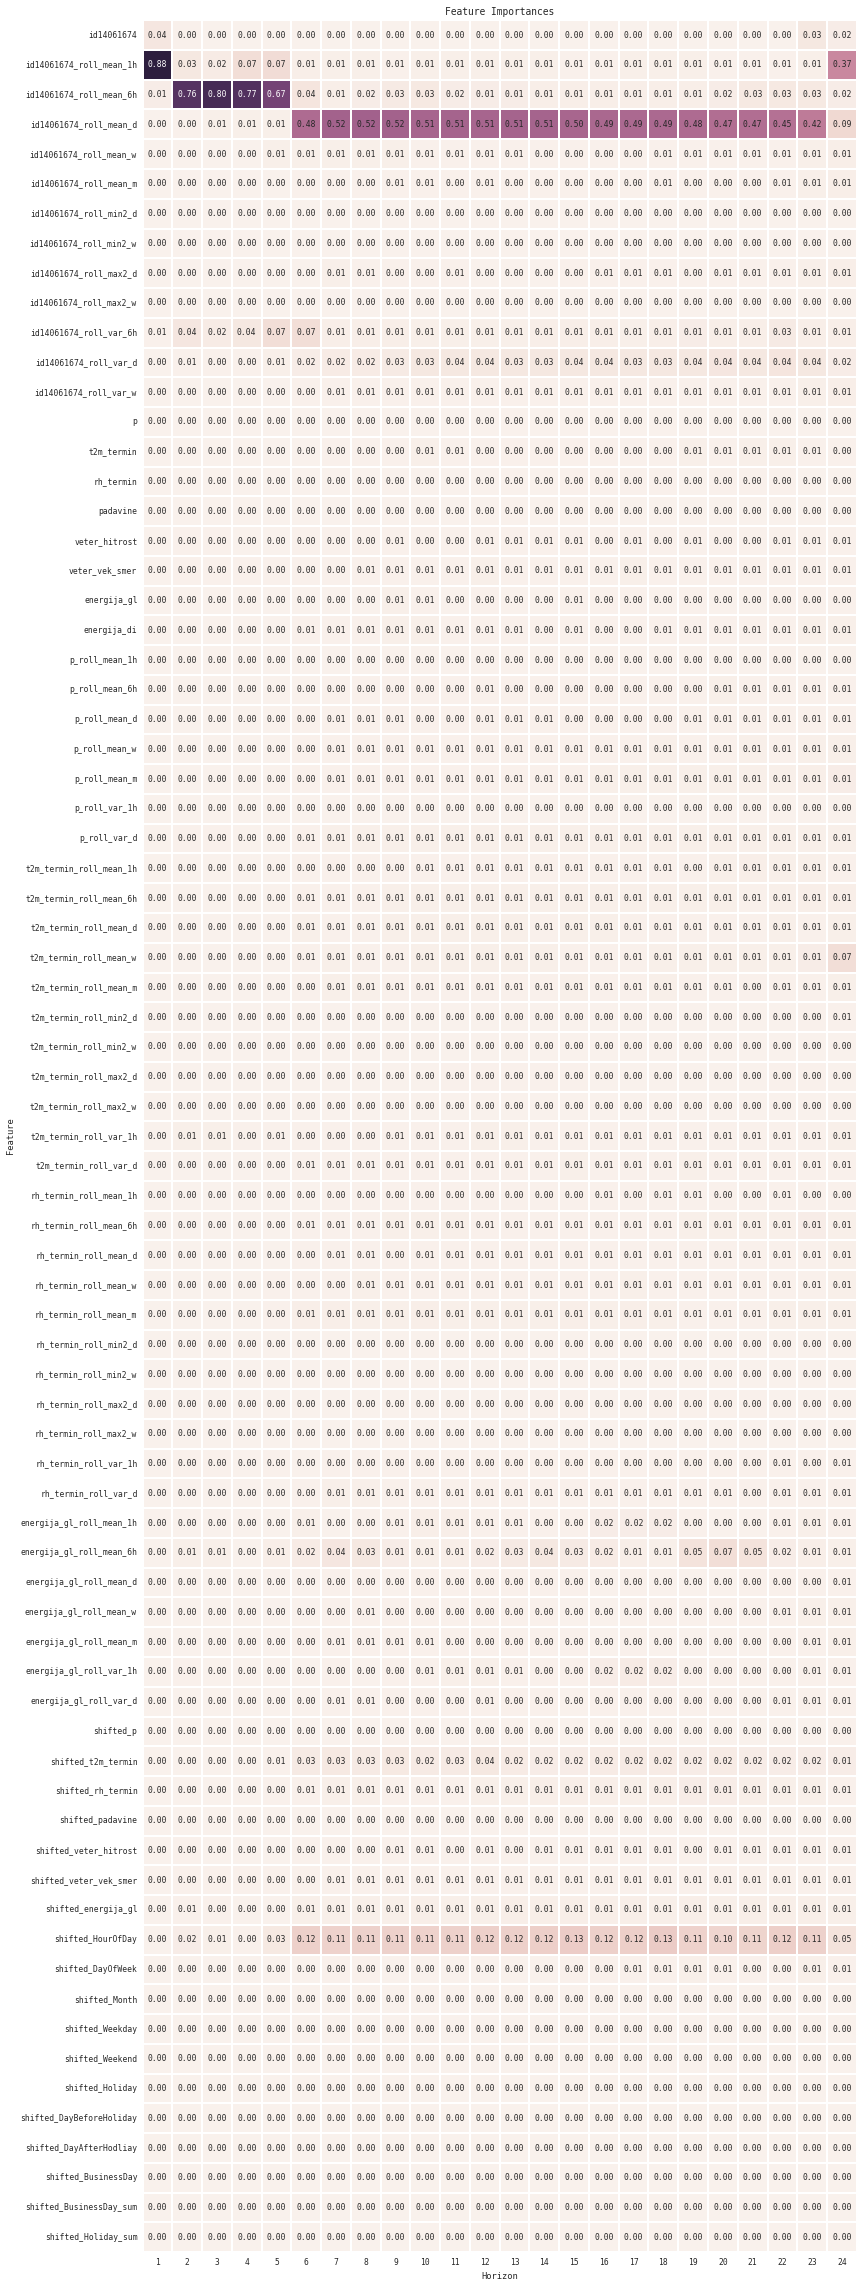

In [31]:
import seaborn as sns
sns.set(context="paper", font="monospace")

f, ax = plt.subplots(figsize=(30, 40))
sns.heatmap(feature_importances, square=True, annot=True, annot_kws={"size": 8}, fmt=".2f", cbar=False)
plt.title("Feature Importances")